<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Effect-of-Economic,-Social,-and-Cultural-Opportunity-on-Academic-Performance" data-toc-modified-id="Effect-of-Economic,-Social,-and-Cultural-Opportunity-on-Academic-Performance-1">Effect of Economic, Social, and Cultural Opportunity on Academic Performance</a></span><ul class="toc-item"><li><span><a href="#by-Ken-Norton" data-toc-modified-id="by-Ken-Norton-1.1">by Ken Norton</a></span></li></ul></li><li><span><a href="#Investigation-Overview" data-toc-modified-id="Investigation-Overview-2">Investigation Overview</a></span><ul class="toc-item"><li><span><a href="#Dataset-Overview" data-toc-modified-id="Dataset-Overview-2.1">Dataset Overview</a></span></li><li><span><a href="#Countries-with-the-most-disadvantaged-students" data-toc-modified-id="Countries-with-the-most-disadvantaged-students-2.2">Countries with the most disadvantaged students</a></span></li><li><span><a href="#Countries-with-the-most-advantaged-students" data-toc-modified-id="Countries-with-the-most-advantaged-students-2.3">Countries with the most advantaged students</a></span></li><li><span><a href="#Nations-with-the-highest-economic,-social,-and-cultural-status" data-toc-modified-id="Nations-with-the-highest-economic,-social,-and-cultural-status-2.4">Nations with the highest economic, social, and cultural status</a></span></li><li><span><a href="#Nations-with-the-lowest-economic,-social,-and-cultural-status" data-toc-modified-id="Nations-with-the-lowest-economic,-social,-and-cultural-status-2.5">Nations with the lowest economic, social, and cultural status</a></span></li><li><span><a href="#Overall-Literacy-Scores-by-Opportunity" data-toc-modified-id="Overall-Literacy-Scores-by-Opportunity-2.6">Overall Literacy Scores by Opportunity</a></span></li></ul></li></ul></div>

# Effect of Economic, Social, and Cultural Opportunity on Academic Performance
## by Ken Norton

# Investigation Overview

In this investigation, I wanted to look at how economic, social, and cultural opportunity affects academic performance worldwide.

## Dataset Overview

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. The dataset included more than 600 dimensions, including an index of how the student's economic, social, and cultural status compared to the broader population. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('data/pisa2012_clean.csv')
df_clean = df.copy()

## Countries with the most disadvantaged students

Several countries had > 50% of their students from disadvantaged backgrounds. Indonesia, Turkey, Peru, Brazil, and Thailand had the highest percentage of disadvantaged students.

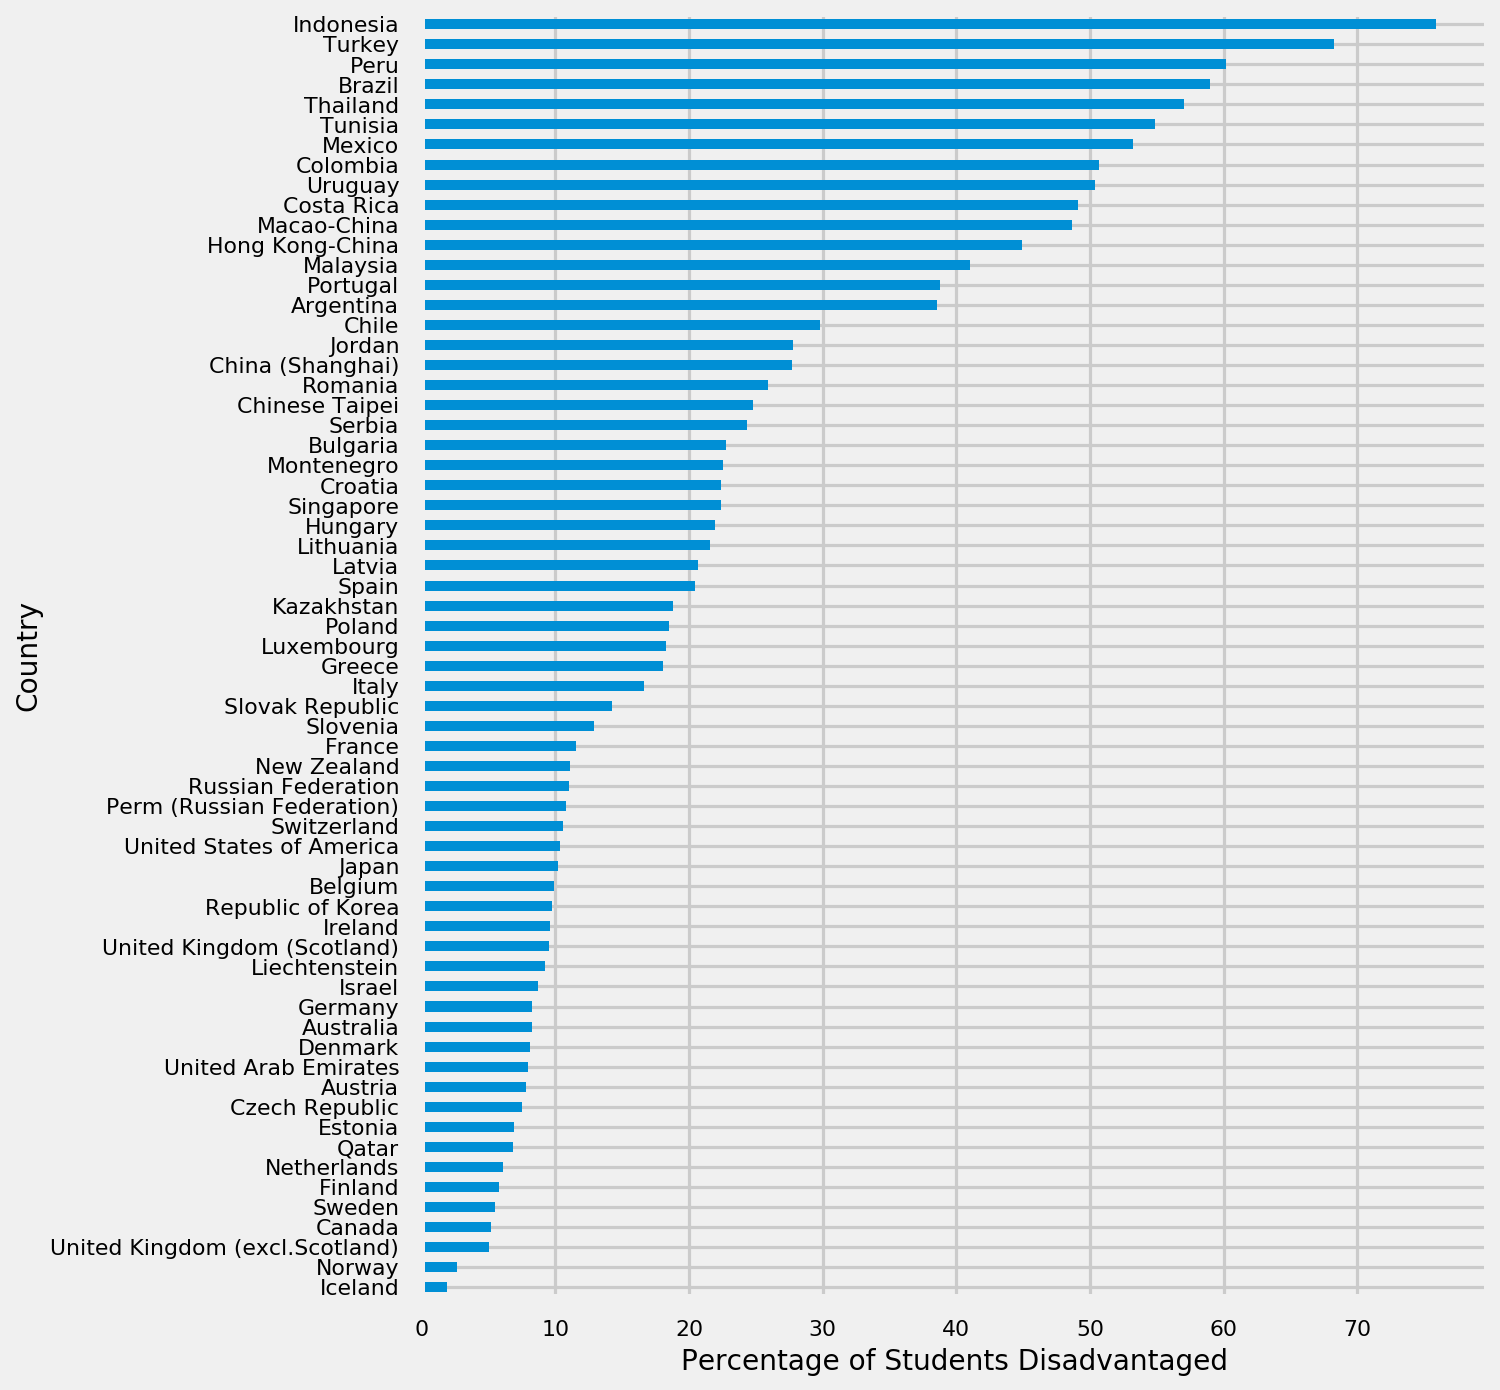

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('disadvantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Disadvantaged", fontsize=14)
plt.show()

## Countries with the most advantaged students

On the other hand, Iceland had by far the largest percentage of advantaged students. No other country had more than 30%. Canada, Qatar, Norway, and Finland rounded out the top five.

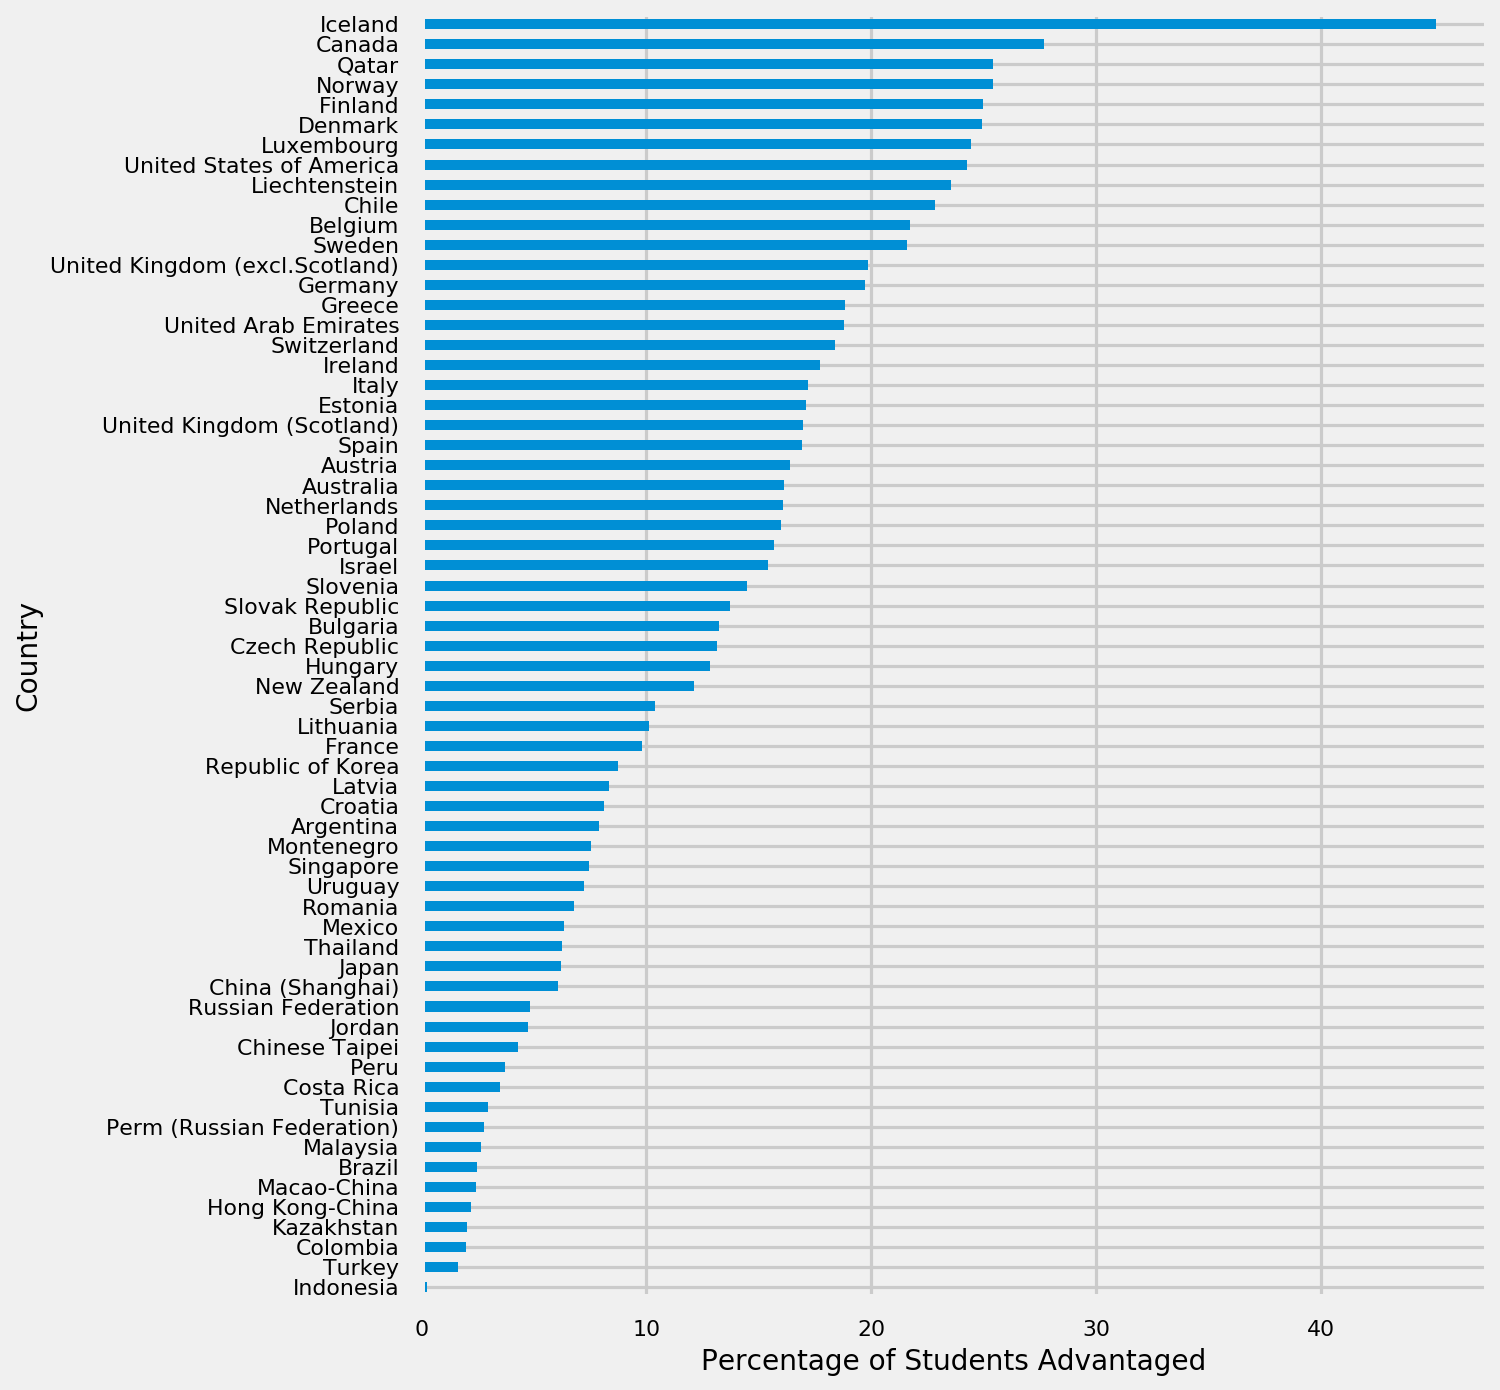

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(8.5, 11)
dt = (df_clean.query('advantaged == 1').groupby('country')['student_id'].count() /
      df_clean.groupby('country')['student_id'].count()).sort_values() * 100
dt.dropna().plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of Students Advantaged", fontsize=14)
plt.show()

## Nations with the highest economic, social, and cultural status

When we look at the overall economic, social, and cultural status for each nation, we can see that the top countries are primarily free nations on the _Freedom House_ Civil Liberties scale.


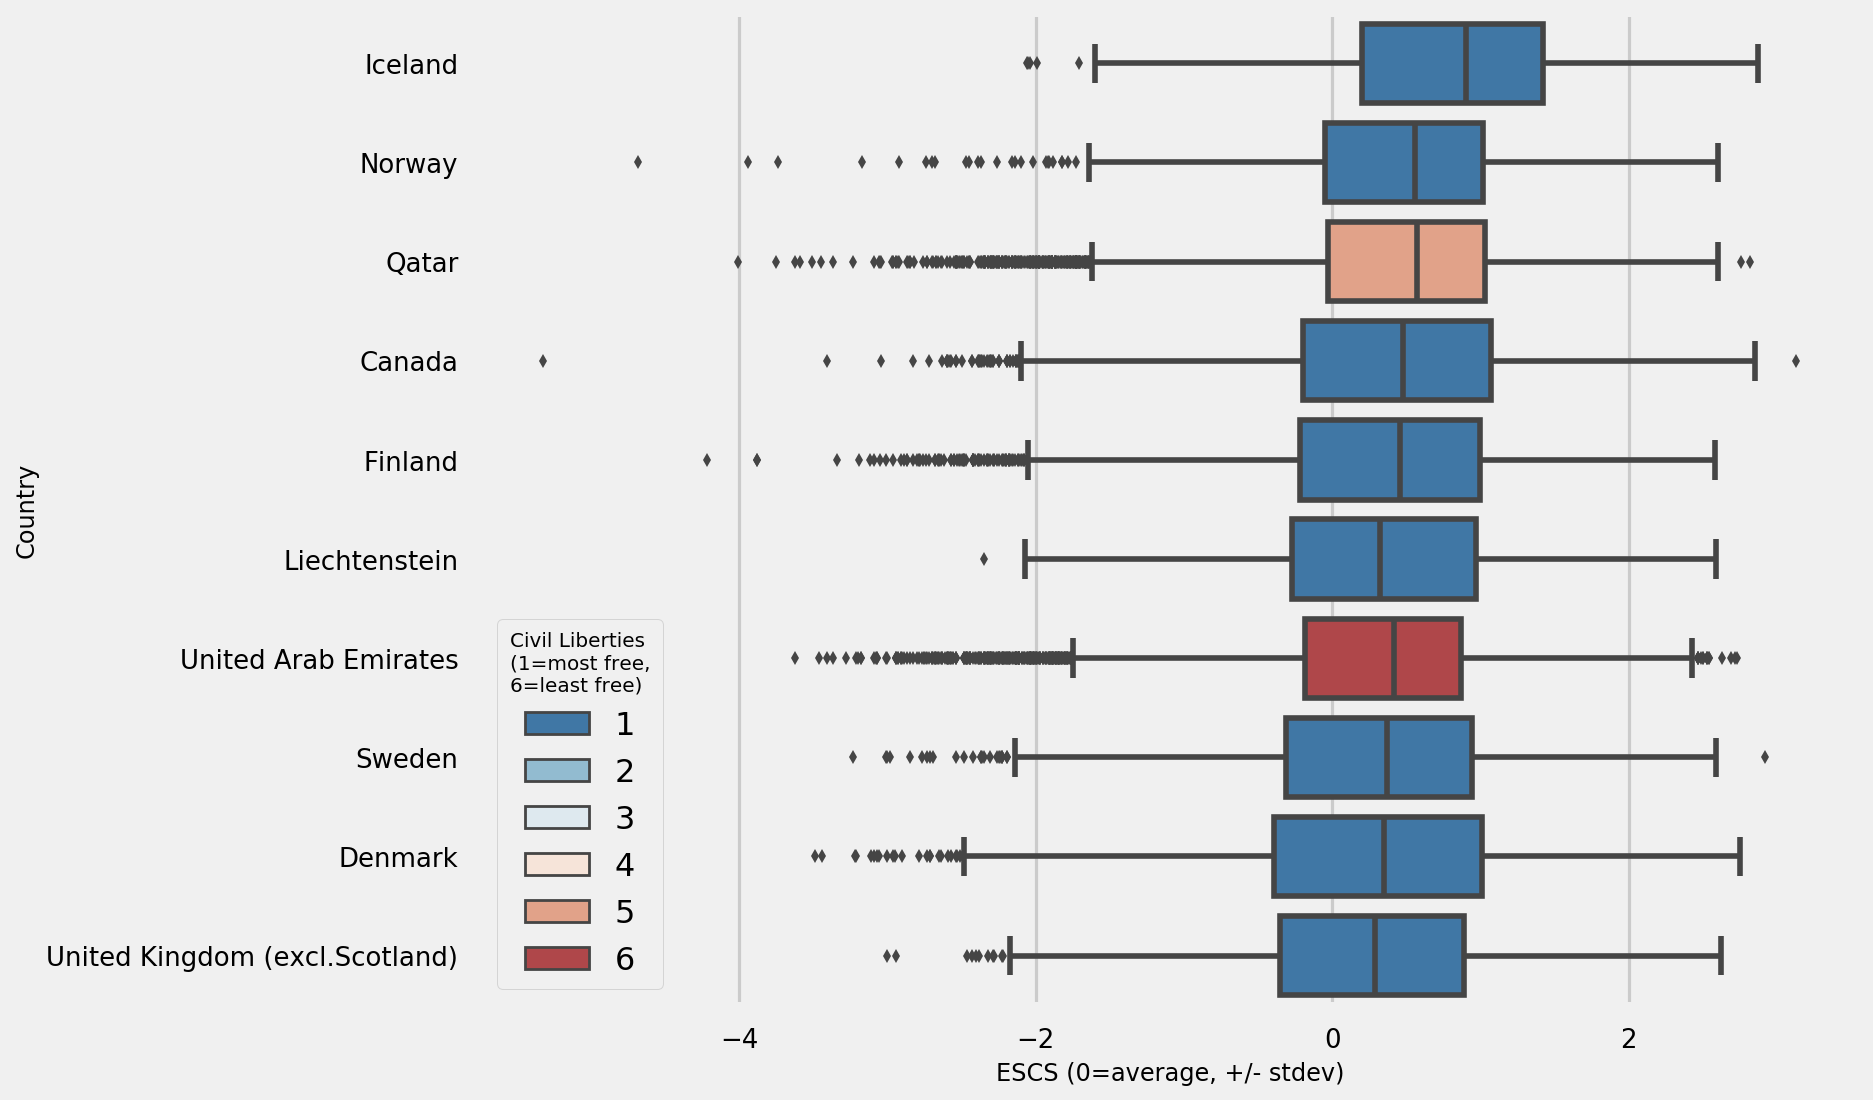

In [6]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().head(10)

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
plt.show()

## Nations with the lowest economic, social, and cultural status

The bottom countries score worse on the _Freedom House_ Civil Liberties scale. Costa Rica is the only country in the bottom ten that scores 1 (most free) on this index. We found that freer countries perform better on the overall academic literacy score than less free countries (p=0.00).


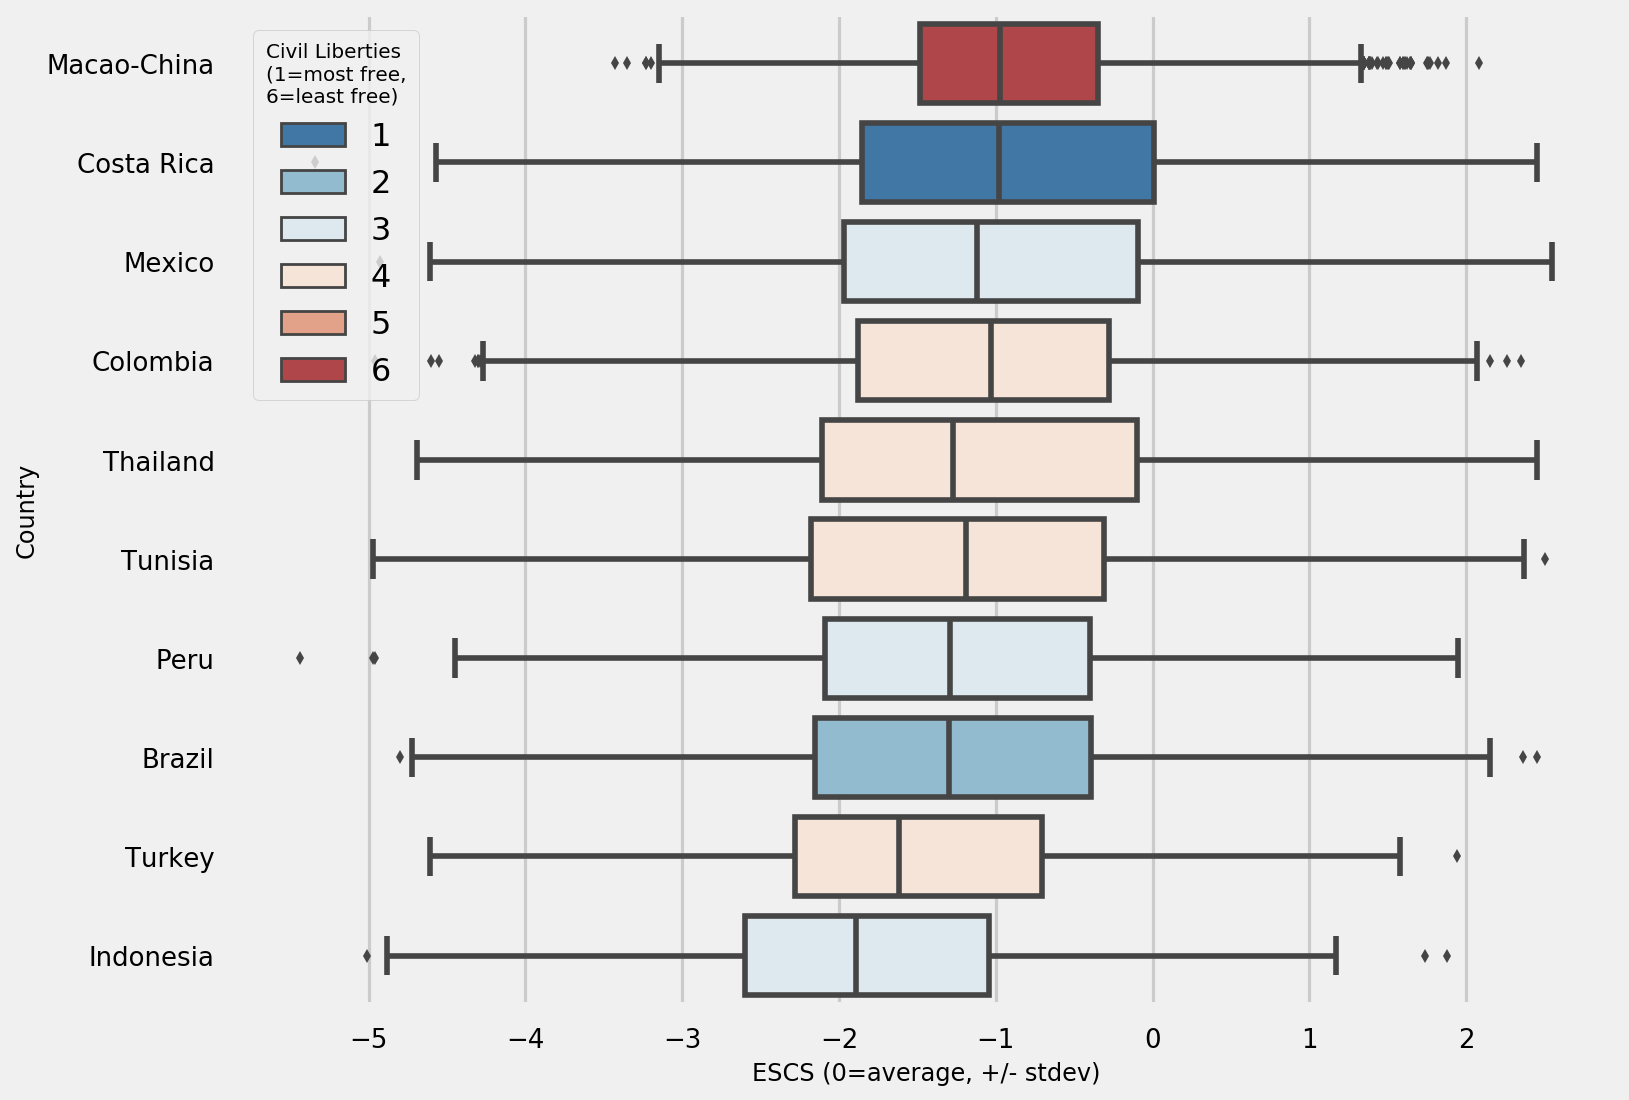

In [7]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().tail(10)

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
legend = ax.legend(loc='best', title_fontsize=10).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=13)
plt.show()

## Overall Literacy Scores by Opportunity

We defined children to be "advantaged" if they were +1 or higher standard deviations above the mean in opportunity. They are "disadvantaged" if the are -1 or lower standard deviations below the mean. We can see that children who are advantaged perform better in overall academic literacy and children that are disadvantaged perform worse. This effect is statistically significant (p=0.00).

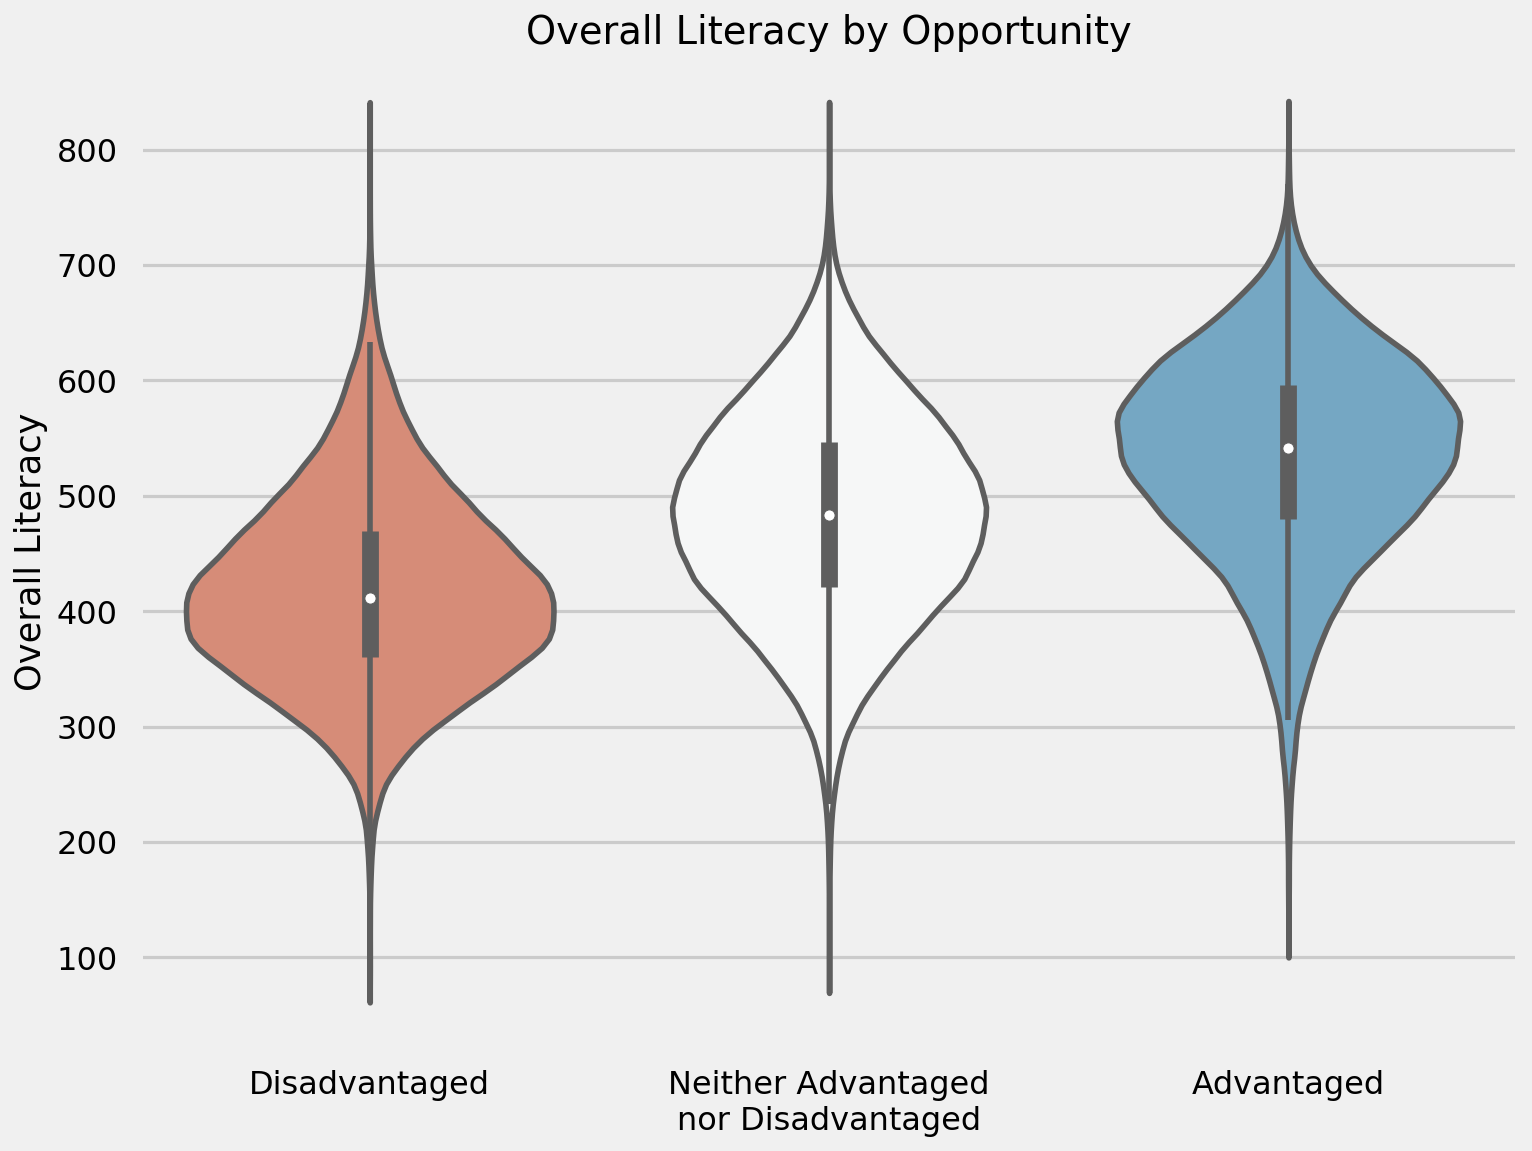

In [8]:
df1 = pd.DataFrame(df.query('disadvantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Disadvantaged')
df2 = pd.DataFrame(df_clean.query('advantaged == 0 and disadvantaged == 0'),
                   columns=['overall_literacy'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df3 = pd.DataFrame(df_clean.query('advantaged == 1'),
                   columns=['overall_literacy']).assign(opp='Advantaged')

cdf = pd.concat([df1, df2, df3])

mdf = pd.melt(cdf, id_vars=['opp'], var_name=['overall_literacy'])

fig, ax = plt.subplots()
fig.set_size_inches(11, 8.5)
ax = sns.violinplot(x='opp', y='value', data=mdf, palette='RdBu')
ax.set_xlabel(None)
ax.set_ylabel("Overall Literacy")
ax.set_title("Overall Literacy by Opportunity")
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!